This notebook will contain initial EDA of the Agrofood CO2 emissions and gdp per capita data sets. The goal is to merge the two sets and then compute a preliminary analysis to see what we are working with. 

First, let's combine the two datasets. We can import both csv files into dataframes and then decide how we would like to connect the two sets.

In [35]:
#import statements
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None)

In [2]:
agro_food = "Agrofood_co2_emission.csv"
gdp_per_cap = "gdp_per_capita.csv"

agro_food_df = pd.read_csv(agro_food)
gdp_df = pd.read_csv(gdp_per_cap)



In [3]:
agro_food_df.head(5)
agro_food_df.shape

(6965, 31)

In [4]:
gdp_df.head(20)

,Country Name,Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6472.398709,7885.158927,9765.909207,11392.269150,12306.717679,13495.794301,14045.474566,14938.681573,16239.987852,16439.356361,16583.875856,17927.959439,19077.687427,19355.333536,20617.750467,20670.367005,20436.887129,20833.976357,22568.374991,23300.738363,24046.226377,25834.111778,27083.634860,24631.182052,23513.527697,24985.013919,24712.493263,26441.619936,26893.011506,28396.908423,28452.170615,29350.805019,30253.279358,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,147.612227,147.014904,156.189192,182.243917,162.347592,180.214908,190.845484,192.337167,204.007099,227.908615,236.793425,254.006969,268.131327,339.759796,410.118240,424.803181,411.513619,456.254185,496.090591,564.002951,688.555399,685.205278,641.783870,643.803760,571.447121,495.664629,542.428124,643.801620,657.347249,657.186356,696.988145,704.427088,683.336134,706.488039,702.415966,771.410097,747.841550,765.967485,703.091356,675.804263,713.245921,633.608789,631.870340,819.743981,993.762711,1129.808710,1237.111802,1382.869039,1442.168158,1412.111284,1634.448253,1770.736230,1736.166560,1713.899299,1703.596298,1549.037940,1431.778723,1573.063386,1574.978648,1530.059177,1359.618224,NaN
2,Afghanistan,AFG,59.773234,59.860900,58.458009,78.706429,82.095307,101.108325,137.594298,160.898434,129.108311,129.329760,156.518771,159.567509,135.317228,143.144650,173.653625,186.510838,197.445508,224.225002,247.354088,275.738115,272.655510,264.111197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,179.426579,190.683814,211.382074,242.031313,263.733602,359.693158,364.663542,437.268740,543.306526,591.190030,638.845852,624.315455,614.223342,556.007221,512.012778,516.679862,485.668419,494.179350,516.747871,NaN
3,Africa Western and Central,AFW,107.932233,113.081647,118.831107,123.442888,131.854402,138.526332,144.326212,128.582470,129.641106,143.715632,195.433565,169.119100,200.168407,241.711430,333.192493,377.788047,444.374421,454.790166,482.477486,584.373991,718.691848,1316.931704,1136.462436,815.900740,656.712783,651.510094,584.907219,584.119206,561.361459,510.419105,594.726009,558.435681,547.663093,445.656206,378.940493,462.864809,523.763527,515.234581,513.642551,528.577394,525.450343,539.335724,627.773944,706.955063,854.506836,1016.475978,1252.595147,1430.796400,1707.272264,1486.572654,1687.551979,1862.308267,1965.118485,2157.481149,2212.853135,1894.310195,1673.835527,1613.473553,1704.139603,1777.918672,1710.073363,NaN
4,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,711.409579,642.768197,620.333123,623.815362,638.099007,758.745063,685.728128,756.767926,792.833017,891.149280,948.338178,NaN,NaN,NaN,251.078348,398.790998,522.679624,514.385174,423.619049,387.785124,556.838632,527.333529,872.494442,982.961008,1255.564513,1902.422150,2599.565948,3121.996085,4080.941034,3122.781599,3587.883645,4615.468219,5100.097027,5254.881126,5408.411700,4166.979833,3506.073128,4095.810057,3289.643995,2809.626088,1776.166868,NaN
5,Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,639.484736,639.865909,693.873475,674.793383,652.774321,697.995597,617.230436,336.586995,200.852220,367.279225,586.416340,750.604449,1009.977275,717.380048,813.789397,1033.242532,1126.683340,1281.659826,1425.124219,1846.120121,2373.581292,2673.786584,2972.742924,3595.038057,4370.539925,4114.134899,4094.348386,4437.142612,4247.630047,4413.062005,4578.633208,3952.802538,4124.055390,4531.019374,5287.663694,5395.659532,5246.292306,NaN
6,Andorra,AND,NaN,NaN,N

Now we are going to attempt the merge. I am going to merge on country name and area. Each row of the Agro dataframe will be appended with the corresponding country's gdp data. There will be some redundancy with years, but we will resolve that later.

In [5]:
agri_gdp_df = pd.merge(agro_food_df, gdp_df, how ='left', left_on='Area', right_on='Country Name')
agri_gdp_df.head()
agri_gdp_df.shape

(6965, 95)

In [6]:
num_unmatched = agri_gdp_df['Country Name'].isna().sum()
print(num_unmatched)

unmatched_rows = agri_gdp_df[agri_gdp_df['Country Name'].isna()]
unique_unmatched_areas = unmatched_rows['Area'].unique()
print(unique_unmatched_areas)

1462
['Anguilla' 'Bahamas' 'Belgium-Luxembourg'
 'Bolivia (Plurinational State of)' 'China, Hong Kong SAR'
 'China, Macao SAR' 'China, mainland' 'China, Taiwan Province of' 'Congo'
 'Cook Islands' 'Czechia' 'Czechoslovakia'
 "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Egypt' 'Ethiopia PDR'
 'Falkland Islands (Malvinas)' 'Gambia' 'Guadeloupe' 'Holy See'
 'Iran (Islamic Republic of)' 'Kyrgyzstan'
 "Lao People's Democratic Republic" 'Martinique' 'Mayotte'
 'Micronesia (Federated States of)' 'Montserrat'
 'Netherlands (Kingdom of the)' 'Netherlands Antilles (former)' 'Niue'
 'Pacific Islands Trust Territory' 'Palestine' 'Republic of Korea'
 'Republic of Moldova' 'Saint Helena, Ascension and Tristan da Cunha'
 'Saint Kitts and Nevis' 'Saint Lucia' 'Saint Pierre and Miquelon'
 'Saint Vincent and the Grenadines' 'Serbia and Montenegro' 'Slovakia'
 'Sudan (former)' 'Tokelau'
 'United Kingdom of Great Britain and Northern Ireland'
 'United Republic of Tanzania' 

In [7]:
unique_gdp_countries = gdp_df['Country Name'].unique()
print(unique_gdp_countries)

['Aruba' 'Africa Eastern and Southern' 'Afghanistan'
 'Africa Western and Central' 'Angola' 'Albania' 'Andorra' 'Arab World'
 'United Arab Emirates' 'Argentina' 'Armenia' 'American Samoa'
 'Antigua and Barbuda' 'Australia' 'Austria' 'Azerbaijan' 'Burundi'
 'Belgium' 'Benin' 'Burkina Faso' 'Bangladesh' 'Bulgaria' 'Bahrain'
 'Bahamas, The' 'Bosnia and Herzegovina' 'Belarus' 'Belize' 'Bermuda'
 'Bolivia' 'Brazil' 'Barbados' 'Brunei Darussalam' 'Bhutan' 'Botswana'
 'Central African Republic' 'Canada' 'Central Europe and the Baltics'
 'Switzerland' 'Channel Islands' 'Chile' 'China' "Cote d'Ivoire"
 'Cameroon' 'Congo, Dem. Rep.' 'Congo, Rep.' 'Colombia' 'Comoros'
 'Cabo Verde' 'Costa Rica' 'Caribbean small states' 'Cuba' 'Curacao'
 'Cayman Islands' 'Cyprus' 'Czech Republic' 'Germany' 'Djibouti'
 'Dominica' 'Denmark' 'Dominican Republic' 'Algeria'
 'East Asia & Pacific (excluding high income)'
 'Early-demographic dividend' 'East Asia & Pacific'
 'Europe & Central Asia (excluding high income)'

In [8]:
area_name_changes = {
    'Bahamas': 'Bahamas, The',
    'Bolivia (Plurinational State of)': 'Bolivia',
    'China, Hong Kong SAR': 'Hong Kong SAR, China',
    'China, Macao SAR': 'Macao SAR, China',
    'China, mainland': 'China',
    'Congo': 'Congo, Rep.',
    'Czechia': 'Czech Republic',
    'Democratic People\'s Republic of Korea': 'Korea, Dem. People\'s Rep.',
    'Democratic Republic of the Congo': 'Congo, Dem. Rep.',
    'Egypt': 'Egypt, Arab Rep.',
    'Iran (Islamic Republic of)': 'Iran, Islamic Rep.',
    'Kyrgyzstan': 'Kyrgyz Republic',
    'Lao People\'s Democratic Republic': 'Lao PDR',
    'Micronesia (Federated States of)': 'Micronesia, Fed. Sts.',
    'Republic of Korea': 'Korea, Rep.',
    'Republic of Moldova': 'Moldova',
    'Saint Kitts and Nevis': 'St. Kitts and Nevis',
    'Saint Lucia': 'St. Lucia',
    'Saint Vincent and the Grenadines': 'St. Vincent and the Grenadines',
    'Slovakia': 'Slovak Republic',
    'United Republic of Tanzania': 'Tanzania',
    'United States of America': 'United States',
    'United States Virgin Islands': 'Virgin Islands (U.S.)',
    'Venezuela (Bolivarian Republic of)': 'Venezuela, RB',
    'Viet Nam': 'Vietnam',
    'Yemen': 'Yemen, Rep.',
    'China, Taiwan Province of': 'Taiwan, China',
    'Ethiopia PDR': 'Ethiopia',
    'Netherlands (Kingdom of the)': 'Netherlands',
    'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom',
    'USSR': 'Russian Federation',
    'Sudan (former)': 'Sudan',
}

agro_food_df['Area'] = agro_food_df['Area'].replace(area_name_changes)
agrifood_df = agro_food_df[agro_food_df['Area'].isin(area_name_changes.keys()) | agro_food_df['Area'].isin(gdp_df['Country Name'])]

Now, lets see if there are any countries with missing values from the pairing process. 

In [9]:
agri_gdp_df = pd.merge(agro_food_df, gdp_df, how ='left', left_on='Area', right_on='Country Name')
agri_gdp_df.head()

num_unmatched = agri_gdp_df['Country Name'].isna().sum()
print(num_unmatched)

unmatched_rows = agri_gdp_df[agri_gdp_df['Country Name'].isna()]
unique_unmatched_areas = unmatched_rows['Area'].unique()
print(unique_unmatched_areas)


578
['Anguilla' 'Belgium-Luxembourg' 'Taiwan, China' 'Cook Islands'
 'Czechoslovakia' 'Falkland Islands (Malvinas)' 'Gambia' 'Guadeloupe'
 'Holy See' 'Martinique' 'Mayotte' 'Montserrat'
 'Netherlands Antilles (former)' 'Niue' 'Pacific Islands Trust Territory'
 'Palestine' 'Saint Helena, Ascension and Tristan da Cunha'
 'Saint Pierre and Miquelon' 'Serbia and Montenegro' 'Tokelau'
 'Wallis and Futuna Islands' 'Western Sahara' 'Yugoslav SFR']


At this point, we have made a good effort to make as many pairings as possible. However, the remaining areas do not necessarily report gdp individually, so we are going to drop them from the study.

In [10]:
agri_gdp_df = agri_gdp_df.dropna(subset=['Country Name'])

agri_gdp_df.head()

print(agri_gdp_df.columns)


Index(['Area', 'Year', 'Savanna fires', 'Forest fires', 'Crop Residues',
       'Rice Cultivation', 'Drained organic soils (CO2)',
       'Pesticides Manufacturing', 'Food Transport', 'Forestland',
       'Net Forest conversion', 'Food Household Consumption', 'Food Retail',
       'On-farm Electricity Use', 'Food Packaging',
       'Agrifood Systems Waste Disposal', 'Food Processing',
       'Fertilizers Manufacturing', 'IPPU', 'Manure applied to Soils',
       'Manure left on Pasture', 'Manure Management', 'Fires in organic soils',
       'Fires in humid tropical forests', 'On-farm energy use',
       'Rural population', 'Urban population', 'Total Population - Male',
       'Total Population - Female', 'total_emission', 'Average Temperature °C',
       'Country Name', 'Code', '1960', '1961', '1962', '1963', '1964', '1965',
       '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974',
       '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983',
      

Now we are going to tackle the problem with years. Right now there are different rows for each country representing a single year. Each of those rows also have the columns from 1960 to 2022 for that countries gdp data. That is redundant. So what we are going to do it look at the "Year" column and get the corresponding gdp for that year and put it in a gdp column. Then we can remove all of the columns that are labeled with years.

In [11]:
def map_gdp_by_year(row, gdp_columns):
    #get the year
    year = row['Year']
    gdp_column_name = str(year)  
    
    #check to see if the col exists
    if gdp_column_name in gdp_columns:
        #return the gdp val for that year
        return row[gdp_column_name]
    else:
        #if the year isnt found return none
        return None 
    
    
agri_gdp_df['Year'] = agri_gdp_df['Year'].astype(str)

agri_gdp_df['gdp'] = None

gdp_columns = [
    '1960', '1961', '1962', '1963', '1964', '1965',
    '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974',
    '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983',
    '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
    '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
    '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
    '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
    '2020'
]
       
for i, row in agri_gdp_df.iterrows():
    year = row['Year']  # Get the year for the current row
    if year in gdp_columns:  # Check if the year exists in the GDP columns
        value = agri_gdp_df.loc[i, year]
        agri_gdp_df.at[i, 'gdp'] = value
        
        
agri_gdp_df = agri_gdp_df.drop(columns=gdp_columns)

agri_gdp_df.head(10)
    

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,Food Household Consumption,Food Retail,On-farm Electricity Use,Food Packaging,Agrifood Systems Waste Disposal,Food Processing,Fertilizers Manufacturing,IPPU,Manure applied to Soils,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C,Country Name,Code,Unnamed: 65,gdp
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,0.0,79.0851,109.6446,14.2666,67.631366,691.7888,252.214190,11.9970,209.9778,260.1431,1590.5319,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167,Afghanistan,AFG,NaN,NaN
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,0.0,80.4885,116.6789,11.4182,67.631366,710.8212,252.214190,12.8539,217.0388,268.6292,1657.2364,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667,Afghanistan,AFG,NaN,NaN
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,0.0,80.7692,126.1721,9.2752,67.631366,743.6751,252.214190,13.4929,222.1156,264.7898,1653.5068,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583,Afghanistan,AFG,NaN,NaN
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,-2388.803,0.0,85.0678,81.4607,9.0635,67.631366,791.9246,252.214190,14.0559,201.2057,261.7221,1642.9623,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917,Afghanistan,AFG,NaN,NaN
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.60,0.0,11.712073,53.9874,-2388.803,0.0,88.8058,90.4008,8.3962,67.631366,831.9181,252.214190,15.1269,182.2905,267.6219,1689.3593,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250,Afghanistan,AFG,NaN,NaN
5,Afghanistan,1995,14.7237,0.0557,243.8152,666.40,0.0,11.712073,54.6445,-2388.803,0.0,90.1626,98.8680,7.7721,67.631366,863.0400,252.214190,15.9118,174.3647,275.2359,1779.3139,397.5498,0.0,0.0,NaN,13401971.0,3697570.0,8219467.0,8199445.0,2624.612529,0.285583,Afghanistan,AFG,NaN,NaN
6,Afghanistan,1996,38.9302,0.2014,249.0364,686.00,0.0,11.712073,53.1637,-2388.803,0.0,93.7905,21.6458,7.2221,67.631366,887.8772,252.214190,16.9535,165.4230,310.1306,1900.5873,465.2050,0.0,0.0,NaN,13952791.0,3870093.0,8569175.0,8537421.0,2838.921329,0.036583,Afghanistan,AFG,NaN,NaN
7,Afghanistan,1997,30.9378,0.1193,276.2940,705.60,0.0,11.712073,52.0390,-2388.803,0.0,93.9696,28.2132,7.4401,67.631366,905.8111,269.476476,18.1079,164.4681,338.9329,2110.6375,511.5927,0.0,0.0,NaN,14373573.0,4008032.0,8916862.0,8871958.0,3204.180115,0.415167,Afghanistan,AFG,NaN,NaN
8,Afghanistan,1998,64.1411,0.3263,287.4346,705.60,0.0,11.712073,52.7050,-2388.803,0.0,95.2597,30.8870,6.5105,67.631366,916.4552,318.548422,19.1808,163.5052,362.5683,2305.3943,541.6598,0.0,0.0,NaN,14733655.0,4130344.0,9275541.0,9217591.0,3560.716661,0.890833,Afghanistan,AFG,NaN,NaN
9,Afghanistan,1999,46.1683,0.0895,247.4980,548.80,0.0,11.712073,35.7630,-2388.803,0.0,98.9876,39.4317,5.5415,67.631366,924.9281,306.779994,20.4208,163.5503,400.5558,2554.6904,611.0611,0.0,0.0,NaN,15137497.0,4266179.0,9667811.0,9595036.0,3694.806533,1.058500,Afghanistan,AFG,NaN,NaN


Now the data is in a better format. However, now we have to determine how many missing values there are:

In [12]:
num_nan_gdp = agri_gdp_df['gdp'].isna().sum()
print(num_nan_gdp)

400


So we need to figure out what to do with these 400 missing values. Let
s see which Countries have missing values:

In [13]:
nan_gdp_rows = agri_gdp_df[agri_gdp_df['gdp'].isna()]
missing_gdp_countries = nan_gdp_rows['Area'].unique()
print(missing_gdp_countries)

['Afghanistan' 'American Samoa' 'Andorra' 'Angola' 'Aruba' 'Belarus'
 'Bosnia and Herzegovina' 'British Virgin Islands' 'Cambodia'
 'Cayman Islands' 'Channel Islands' 'Croatia' "Korea, Dem. People's Rep."
 'Eritrea' 'Estonia' 'Faroe Islands' 'French Polynesia' 'Georgia'
 'Gibraltar' 'Greenland' 'Guam' 'Hungary' 'Iran, Islamic Rep.'
 'Isle of Man' 'Israel' 'Kuwait' 'Latvia' 'Liberia' 'Liechtenstein'
 'Lithuania' 'Mozambique' 'Nauru' 'New Caledonia'
 'Northern Mariana Islands' 'Palau' 'Moldova' 'San Marino'
 'Sao Tome and Principe' 'Slovenia' 'Somalia' 'South Sudan'
 'Syrian Arab Republic' 'Timor-Leste' 'Turkmenistan'
 'Turks and Caicos Islands' 'Virgin Islands (U.S.)' 'Venezuela, RB'
 'Yemen, Rep.']


Yikes. Lets see which countries have more than 5 missing values

In [14]:
nan_gdp_rows = agri_gdp_df[agri_gdp_df['gdp'].isna()]
missing_gdp_counts = nan_gdp_rows.groupby('Area').size()
countries_with_more_than_5_missing = missing_gdp_counts[missing_gdp_counts > 5]

print("Countries with more than 5 missing GDP values:")
print(countries_with_more_than_5_missing)

Countries with more than 5 missing GDP values:
Area
Afghanistan                  12
American Samoa               12
British Virgin Islands       31
Cayman Islands               16
Channel Islands              21
Eritrea                       9
Faroe Islands                 9
French Polynesia             20
Gibraltar                    31
Guam                         12
Isle of Man                   6
Korea, Dem. People's Rep.    31
Liberia                      10
Nauru                        20
Northern Mariana Islands     12
Palau                         9
San Marino                   10
Sao Tome and Principe        11
Somalia                      22
Timor-Leste                  10
Turks and Caicos Islands     11
Venezuela, RB                 6
Virgin Islands (U.S.)        13
dtype: int64


In [15]:
nan_gdp_rows = agri_gdp_df[agri_gdp_df['gdp'].isna()]
missing_gdp_years = nan_gdp_rows.groupby('Area')['Year'].apply(list)
print("Missing GDP years for each country:")
for country, years in missing_gdp_years.items():
    print(f"{country}: {years}")

Missing GDP years for each country:
Afghanistan: ['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001']
American Samoa: ['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001']
Andorra: ['2020']
Angola: ['1991', '1992', '1993']
Aruba: ['2019', '2020']
Belarus: ['1992', '1993']
Bosnia and Herzegovina: ['1992', '1993']
British Virgin Islands: ['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']
Cambodia: ['1990', '1991', '1992']
Cayman Islands: ['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005']
Channel Islands: ['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', 

Since there is so much missing data, I have decided to make the cut off at 5 missing years. If the Country is missing more than 5 years worth of data, it is getting dropped from the set. Otherwise, the mean of the gdp for that area will be computed and imputed into the set. There should be no remaining nans after this step. 

In [16]:
nan_gdp_rows = agri_gdp_df[agri_gdp_df['gdp'].isna()]
missing_gdp_counts = nan_gdp_rows.groupby('Area').size()
countries_to_drop = missing_gdp_counts[missing_gdp_counts > 5].index
agri_gdp_df = agri_gdp_df[~agri_gdp_df['Area'].isin(countries_to_drop)]
mean_gdp_by_country = agri_gdp_df.groupby('Area')['gdp'].transform('mean')
agri_gdp_df['gdp'] = agri_gdp_df['gdp'].fillna(mean_gdp_by_country)

agri_gdp_df.head()

C:\Users\l3n3c\AppData\Local\Temp\ipykernel_24144\614932335.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  agri_gdp_df['gdp'] = agri_gdp_df['gdp'].fillna(mean_gdp_by_country)


,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,Food Household Consumption,Food Retail,On-farm Electricity Use,Food Packaging,Agrifood Systems Waste Disposal,Food Processing,Fertilizers Manufacturing,IPPU,Manure applied to Soils,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C,Country Name,Code,Unnamed: 65,gdp
31,Albania,1990,5.5561,7.0253,59.2391,23.5200,110.5705,2.0,46.9645,72.8581,0.0,16.0124,8.3013,45.2103,2.8500,444.4512,131.569124,356.491017,767.1456,196.6440,383.3071,474.6951,0.0,0.0,320.8805,2086075.0,1195379.0,1676902.0,1618163.0,3475.291240,0.735750,Albania,ALB,NaN,617.230436
32,Albania,1991,5.5561,7.0253,31.4625,6.2720,110.5705,2.0,47.9519,72.8581,0.0,11.4657,2.7448,18.4951,3.2048,443.8552,131.569124,2903.861149,628.6596,194.1851,394.0694,469.1415,0.0,0.0,195.1879,2073348.0,1202083.0,1675168.0,1626914.0,5680.135772,-0.461500,Albania,ALB,NaN,336.586995
33,Albania,1992,5.5561,7.0253,29.9373,1.8816,110.5705,2.0,40.5272,72.8581,0.0,7.9077,3.4281,4.2558,3.6700,445.0997,131.569124,2903.861149,247.2039,187.3747,400.0541,453.2180,0.0,0.0,163.1332,2033508.0,1207079.0,1670550.0,1633189.0,5221.131572,0.318250,Albania,ALB,NaN,200.852220
34,Albania,1993,5.5561,7.0253,44.0550,1.0976,110.5705,2.0,57.6592,72.8581,0.0,16.5217,7.0102,8.6999,4.4197,446.7996,131.569124,2903.861149,263.8111,198.8094,426.4171,481.3836,0.0,0.0,126.8489,1983942.0,1205641.0,1663515.0,1637195.0,5316.973272,0.270500,Albania,ALB,NaN,367.279225
35,Albania,1994,5.5561,7.0253,42.4253,0.0000,110.5705,3.0,72.4242,72.8581,0.0,17.5634,5.7802,3.0976,5.1834,449.4347,131.569124,2903.861149,212.3739,260.3013,546.0098,620.2991,0.0,0.0,94.9545,1936056.0,1204539.0,1654796.0,1639203.0,5564.287672,1.202667,Albania,ALB,NaN,586.416340


In [17]:
num_nan_gdp = agri_gdp_df['gdp'].isna().sum()
print(num_nan_gdp)

0


Now lets drop the unnecessary columns and then check for any missing values in other columns

In [18]:
agri_gdp_df = agri_gdp_df.drop(columns=['Unnamed: 65', 'Country Name'])

In [19]:
rows_with_missing_values = agri_gdp_df.isna().sum(axis=1)
num_rows_with_missing = (rows_with_missing_values > 0).sum()
print(num_rows_with_missing)

1305


So there is still a decent amount of missing information. Let's go through and clean it up. 

In [24]:
rows_with_missing_values = agri_gdp_df[agri_gdp_df.isna().any(axis=1)]
# rows_with_missing_values


In [21]:
missing_values_per_column = agri_gdp_df.isna().sum()

# Step 2: Display the result
print(missing_values_per_column)

Area                                 0
Year                                 0
Savanna fires                        0
Forest fires                        31
Crop Residues                      532
Rice Cultivation                     0
Drained organic soils (CO2)          0
Pesticides Manufacturing             0
Food Transport                       0
Forestland                         277
Net Forest conversion              277
Food Household Consumption          34
Food Retail                          0
On-farm Electricity Use              0
Food Packaging                       0
Agrifood Systems Waste Disposal      0
Food Processing                      0
Fertilizers Manufacturing            0
IPPU                               124
Manure applied to Soils            251
Manure left on Pasture               0
Manure Management                  251
Fires in organic soils               0
Fires in humid tropical forests     62
On-farm energy use                 655
Rural population         

In [22]:
agri_gdp_df.shape

(5679, 33)

In [26]:
agri_gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5679 entries, 31 to 6964
Data columns (total 33 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Area                             5679 non-null   object 
 1   Year                             5679 non-null   object 
 2   Savanna fires                    5679 non-null   float64
 3   Forest fires                     5648 non-null   float64
 4   Crop Residues                    5147 non-null   float64
 5   Rice Cultivation                 5679 non-null   float64
 6   Drained organic soils (CO2)      5679 non-null   float64
 7   Pesticides Manufacturing         5679 non-null   float64
 8   Food Transport                   5679 non-null   float64
 9   Forestland                       5402 non-null   float64
 10  Net Forest conversion            5402 non-null   float64
 11  Food Household Consumption       5645 non-null   float64
 12  Food Retail             

Converting year to int for graphing.

In [32]:
agri_gdp_df["Year"] = pd.to_numeric(agri_gdp_df["Year"])
# agri_gdp_df["Year"]

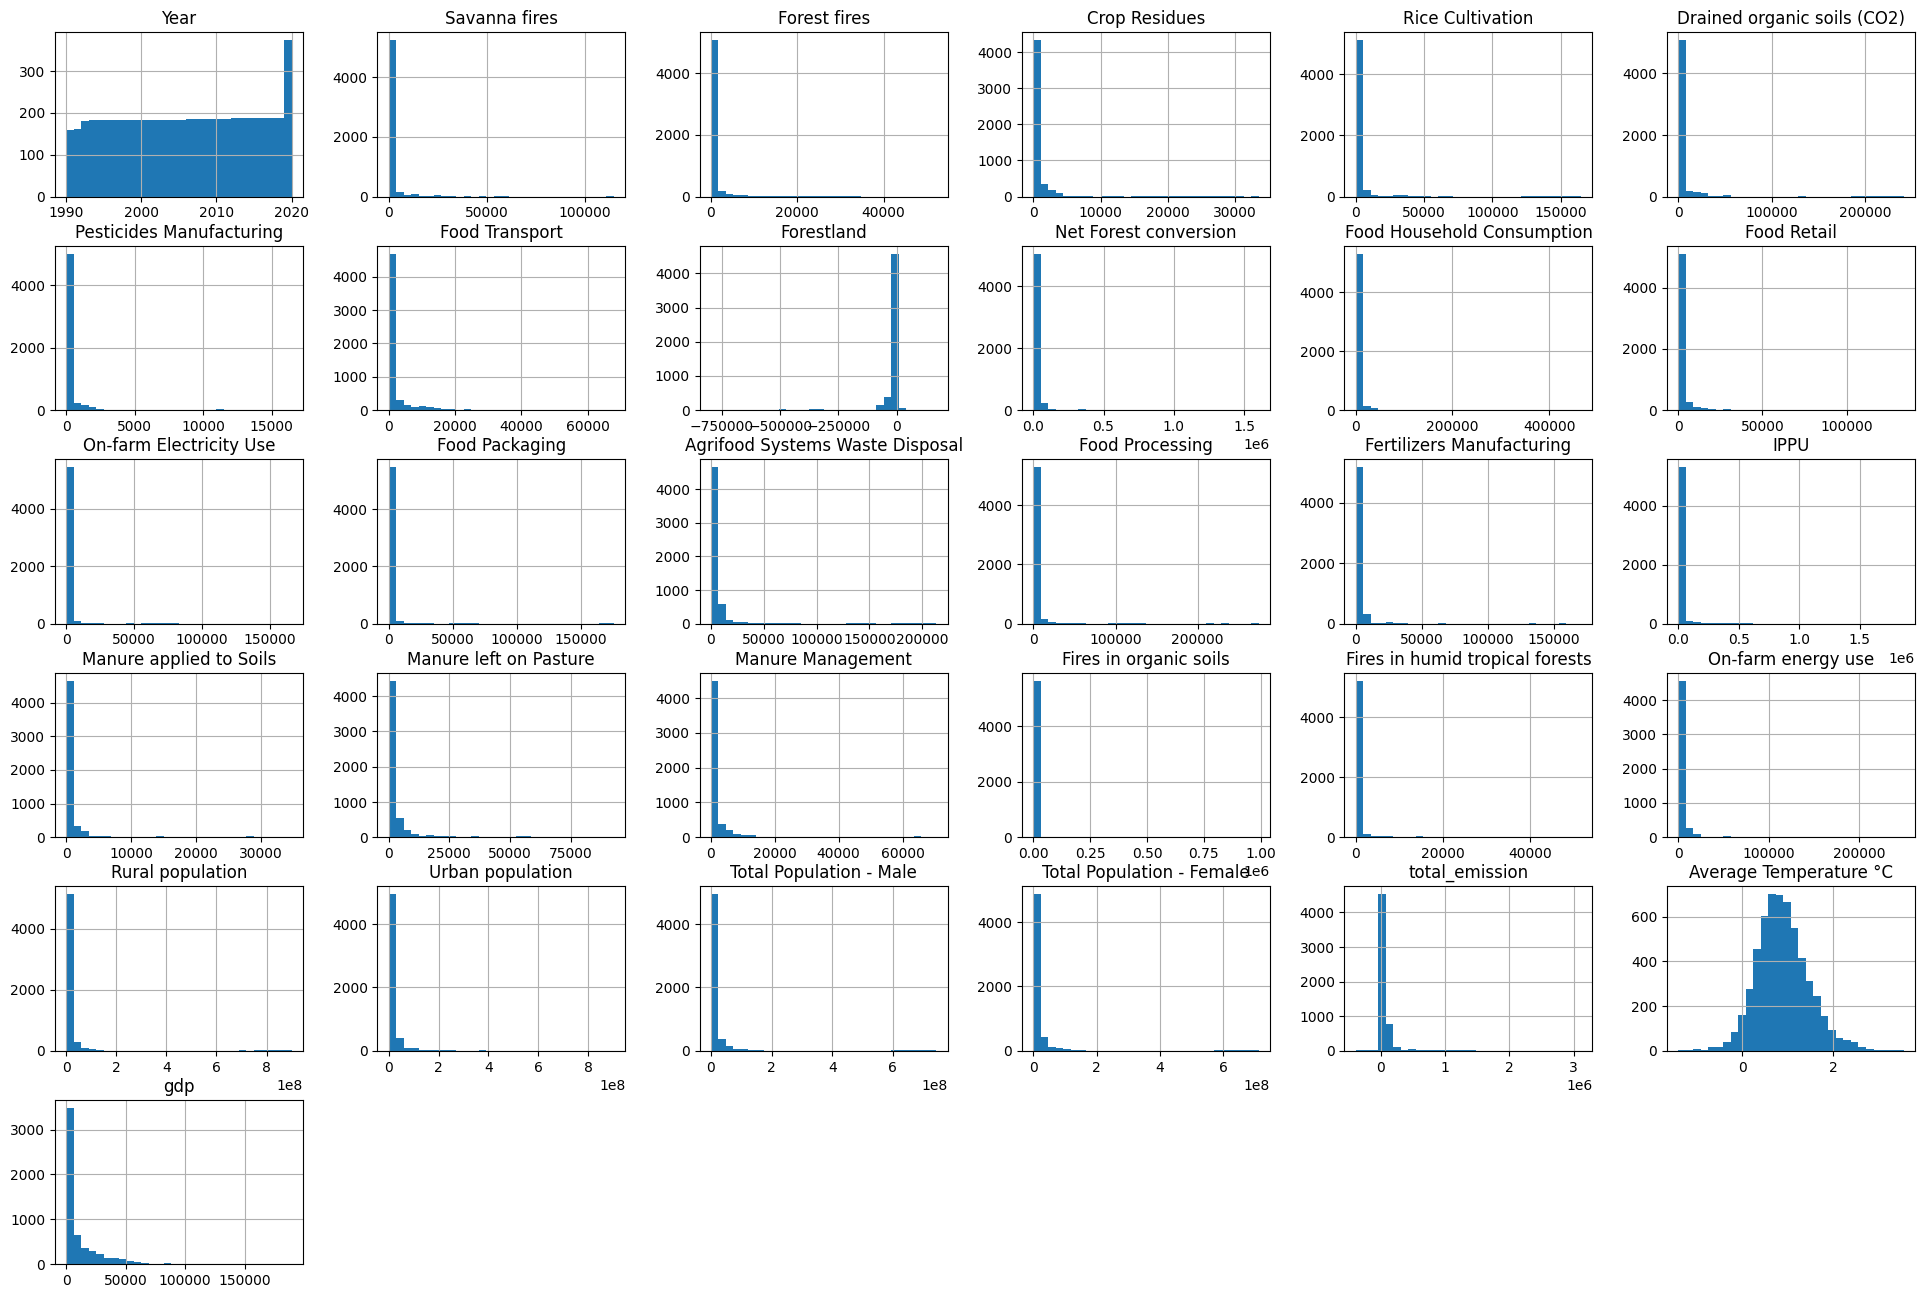

In [56]:
agri_gdp_df.hist(bins=30, figsize=(24,16))
plt.show()

Creating correlation matrix to find important relations between features.

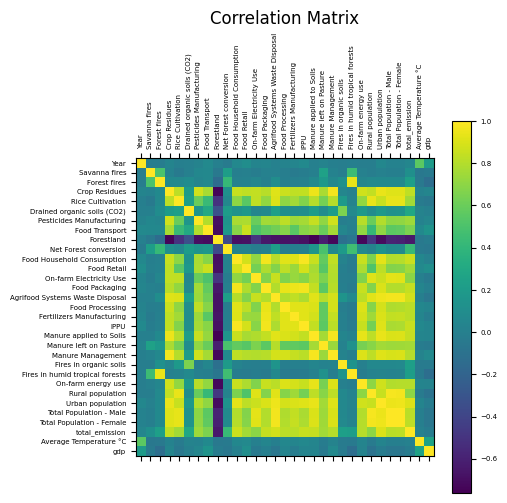

In [40]:
plt.matshow(agri_gdp_df.corr(numeric_only=True))

plt.xticks(range(agri_gdp_df.select_dtypes(['number']).shape[1]), agri_gdp_df.select_dtypes(['number']).columns, fontsize=5, rotation=90)
plt.yticks(range(agri_gdp_df.select_dtypes(['number']).shape[1]), agri_gdp_df.select_dtypes(['number']).columns, fontsize=5)

cb = plt.colorbar()
cb.ax.tick_params(labelsize=5)

plt.title('Correlation Matrix')
plt.show()

Forestland immediately stands out as being very negatively correlated with most other features. Looking further into the feature below...
Seems to have a lot of negative values, missing data, and zeros, but is supposed to represent land covered with forests in each country (units unknown). Zeros and missing values can be filled in with the average of the column before being used for training.

In [48]:
agri_gdp_df["Forestland"].isnull().sum()

277

In [49]:
agri_gdp_df["Forestland"].value_counts()

Forestland
 0.0000         1213
-350983.5047      22
-4.9610           21
-333.7277         21
-61.5014          21
-909.3333         21
-672.1000         21
-1132.7800        20
-2016.8720        20
-5.9840           20
-333882.5239      20
-62.9200          20
-3.7462           15
-85.6827          15
 2.5125           11
-2843.1953        11
-4458.2606        11
-10946.0340       11
-46.8270          11
-19.0487          11
-69.5346          11
-82832.9333       11
 259.6927         11
 72.8581          11
-148.9119         11
-8642.8357        11
-65.4588          11
-6.5866           11
-20763.1020       11
 10.7375          11
-37.2057          11
-195.0887         11
-0.1356           11
-568.0565         11
-67909.0539       11
-169.9170         11
-607.7215         11
-510.4909         11
-25.1638          11
-1.4222           11
-2299.3872        11
-822.9159         11
 154.0510         11
 36389.6148       11
-227396.9133      11
-43068.9652       11
-20.1724          11
-2

<Axes: xlabel='Forestland', ylabel='total_emission'>

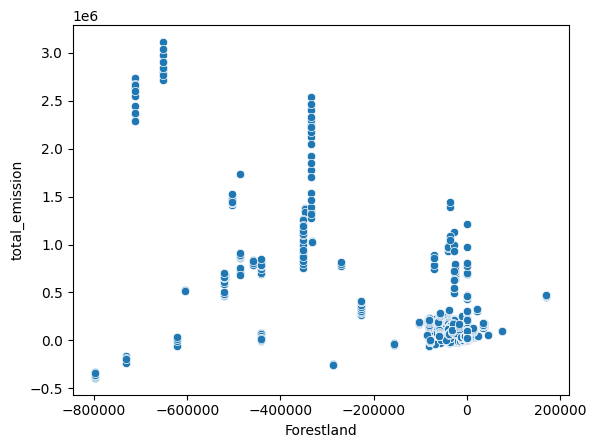

In [46]:

sns.scatterplot(data=agri_gdp_df,x='Forestland',y='total_emission')

<Axes: xlabel='Forestland', ylabel='gdp'>

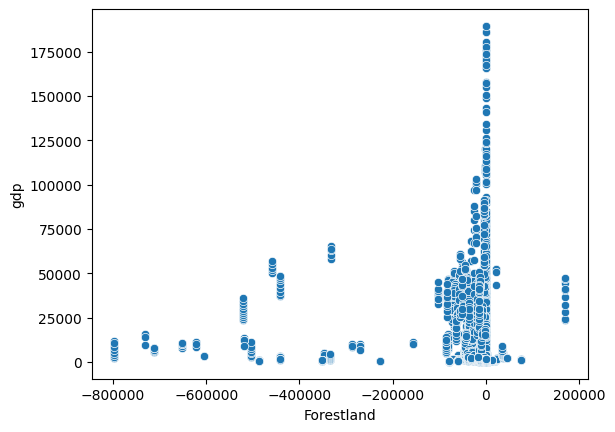

In [47]:
sns.scatterplot(data=agri_gdp_df,x='Forestland',y='gdp')

Plotting other features...

<Axes: xlabel='gdp', ylabel='total_emission'>

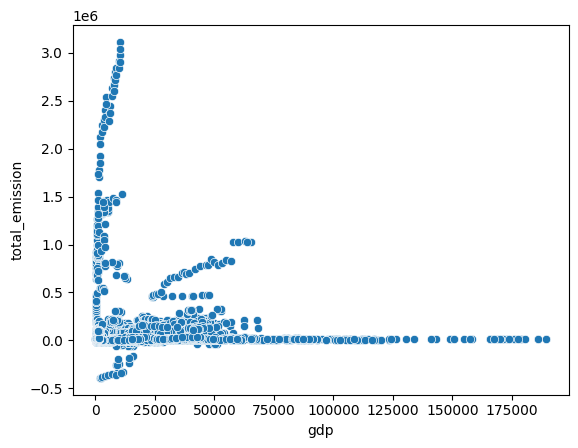

In [45]:
sns.scatterplot(data=agri_gdp_df,x='gdp',y='total_emission')

<Axes: xlabel='Year', ylabel='total_emission'>

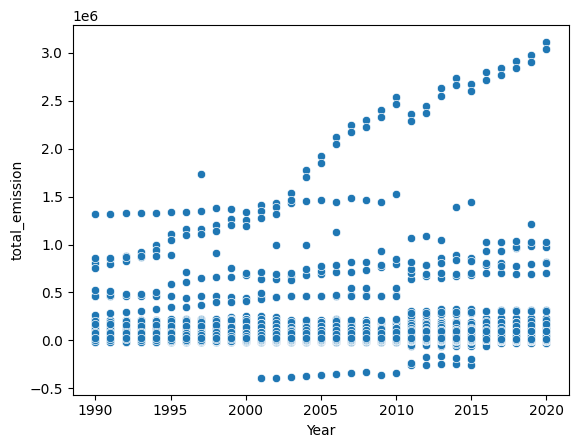

In [54]:
sns.scatterplot(data=agri_gdp_df,x='Year',y='total_emission')